This is an example of the code used to generate a standard set of 10 launch angles in a specified solid angle (default pi/9) with initial phase of 0 and polarization along +x and then shift the source. 

Functions used are explicitly redefined 

Mira Liu
08/14/2019

In [4]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunctions import * 
from random import uniform
import random
import pickle
import math
import time

In [5]:
## CREATES INITIAL RAYS TO BE USED FOR ALL SIMULATIONS FOLLOWING
n = 10 #number of rays USUALLY 500, 10 used just to check functionality
r = 0 #radius of source point range (0 means single launch point)
thetG = [0,0,0] #center of solid angle ([0,0,0] means vertical)
lim =np.pi/9 #solid angle ~20 degrees 
spo = [0,0,0] # arbitrary here as source point is set later
Lamd =2.089 #wavelength of rays
Nsize = Nsized(Lamd) #number of mirror positions (830 for Lamd 2.089)
Freq = float(300/Lamd) #frequency of rays
Rays1 = makerays_Zero_narrow(spo,thetG,r,n,lim) # initial set of rays
xdet,ydetpos,ydetneg = drawcircle(160.375, -113, 7.9375) #detector range

began:  2019-08-15 14:24:02
CURRENTLY RUNNING...
COMPLETED
total time: ~ 6.533449018001557 mins


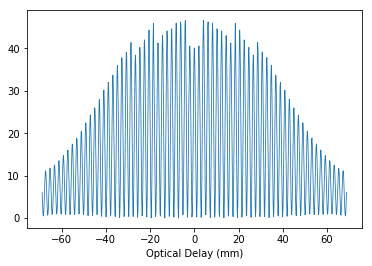

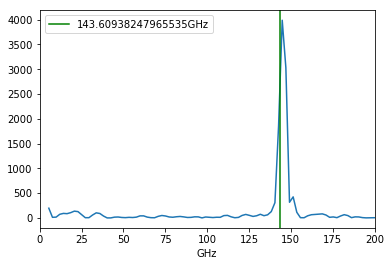

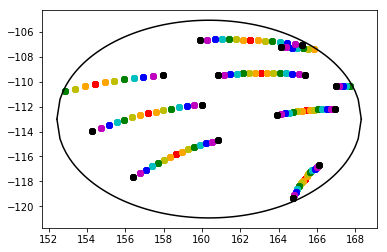

In [6]:
Timei = time.time() #begin timer
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

#Lamd =2.089
#Nsize = Nsized(Lamd)
#Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #center of source in global coordinates
spo2 = [-161.375,-113.,-80.0] #moved 1mm in negative x direction
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees

Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #shift the rays to new launch point
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2) #Run simulation and return Delay, Interference, and points on detector

Timef = time.time() #end timer
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as F:
    pickle.dump(DET,F)

# generate spectrum
d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

# plot interferogram
pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

# plot spectrum with expected frequency value 
pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

# plot final location on detector of rays at eight different mirror positions. 
# colors in order of red, orange, yellow, cyan, blue, magenta, black (or reversed depending on side of mirror reflected)
# red as center, when mirror is in center. in colors 
pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i]) #can change size of marker with s = 1;
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

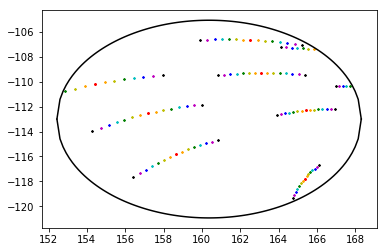

In [9]:
pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1) #can change size of marker with s = 1;
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()  

from scipy import interpolate

def splineinterp(D,I,num): 
    x = np.linspace(min(D),max(D),num)
    tck = interpolate.splrep(D,I)
    y = interpolate.splev(x, tck)
    return x, y

x,y = splineinterp(Delay1,Ij1,19)
pl.plot(Delay1,Ij1)
pl.plot(x,y)
pl.show()

x2,y2 = splineinterp1(x,y,Nsize)

pl.plot(Delay1,Ij1-y2)
pl.show()

In [7]:
if int(4) % 2==0:
    print('1')

1


In [ ]:
from scipy.interpolate import interp1d

#trying with averaging
def splineinterpAv(D,I,N): 
    length = len(D) #number of total points
    SegPoint = int(length/N) #number of points per N segments
    Iseg = []#average per segment (rather than one point chosen)
    x = [] # middle Delay1 value of segment
    # to keep symmetrical!!! 
    if int(N) %2 == 0:
        x,f,Iseg = splineEven(D,I,N)
    else:
        x,f,Iseg = splineOdd(D,I,N)
    return x,f,Iseg

#work on following
def splineOdd(D,I,N): 
    length = len(D) #number of total points
    SegPoint = int(length/N) #number of points per N segments
    MidPoint = length/2
    Iseg = []#average per segment (rather than one point chosen)
    x = [] # middle Delay1 value of segment
    for i in range(-(N-1)/2,(N-1)/2): #for each Nth segment
        AvSig = np.average(I[int(MidPoint +(i*SegPoint - (SegPoint/2))):int(MidPoint +(i*SegPoint +(SegPoint/2)))])
        Iseg.append(AvSig)
        x.append(D[int(i*SegPoint)])
    f = interp1d(x,Iseg)
    return x,f,Iseg



x,y,Iseg = splineinterpAv(Delay1,Ij1,20)
pl.plot(Delay1,Ij1)
pl.plot(x,Iseg)
pl.show()

#x2,y2 = splineinterp1(x,y,Nsize)

#pl.plot(Delay1,Ij1-y2)
#pl.show()